
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message in read.table("county_complete2.csv", sep = ",", header = TRUE):
“incomplete final line found by readTableHeader on 'county_complete2.csv'”

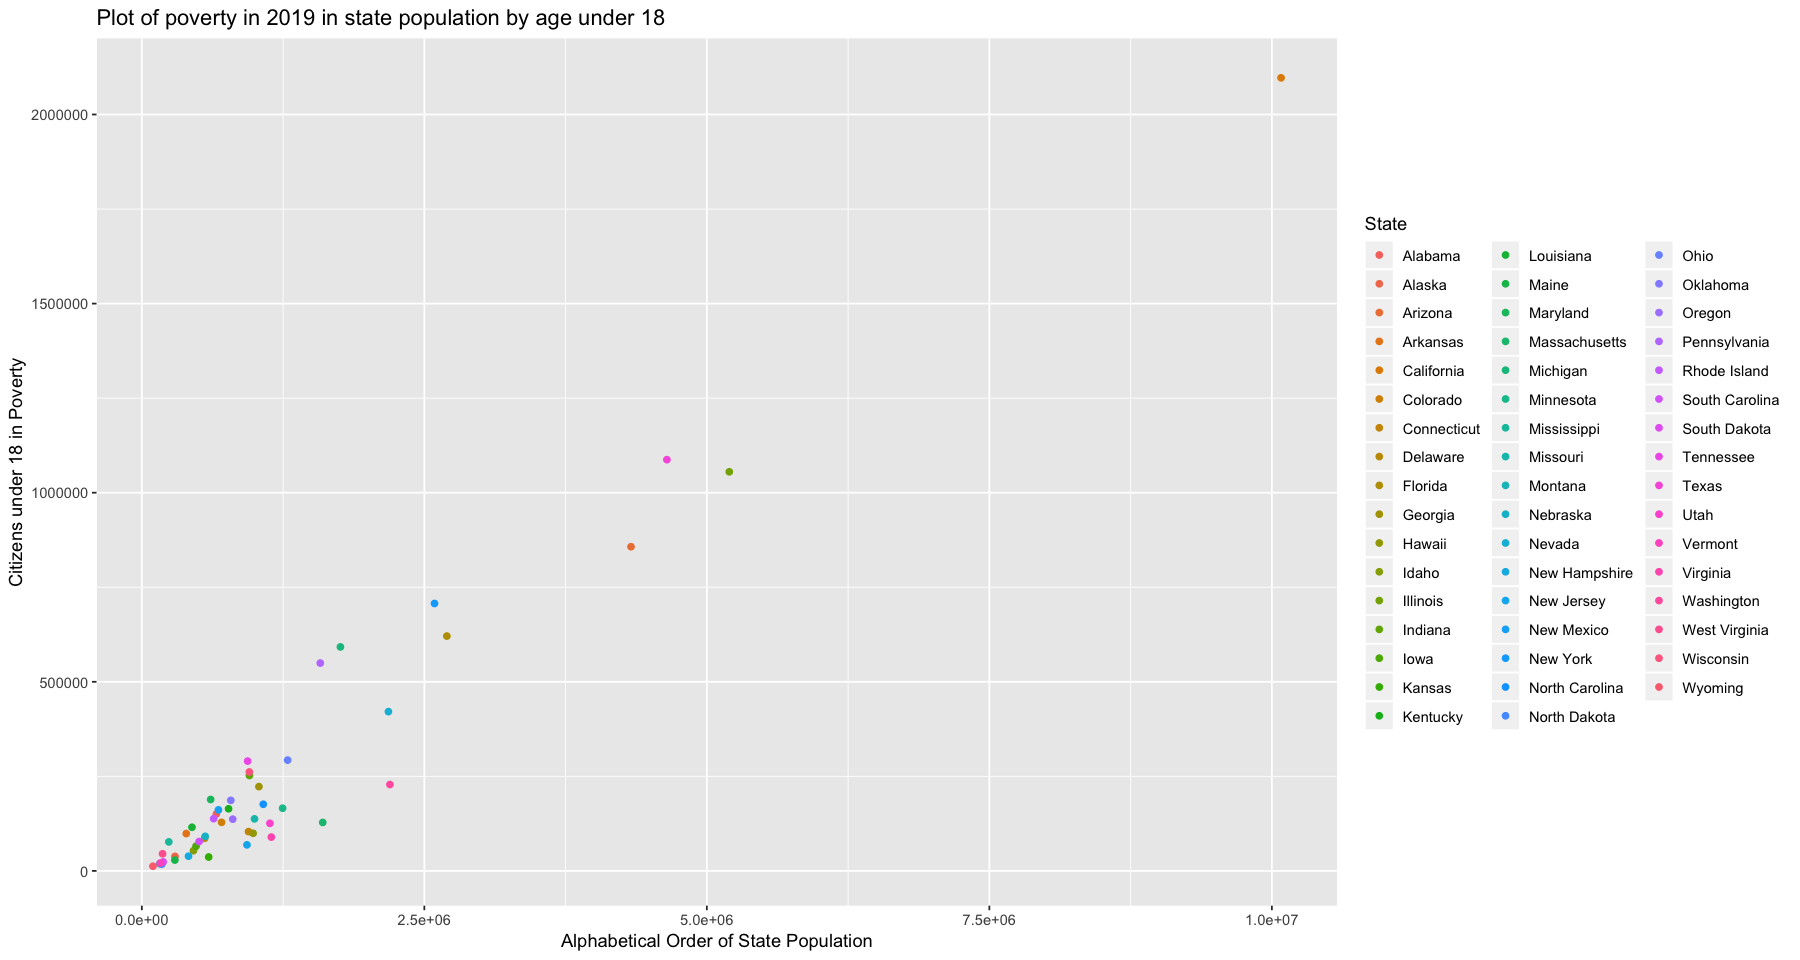

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)

States = c('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
      'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
      'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
      'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
      'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming')


pop19 = c()
by_county = c()
table = data.frame(read.table("county_complete2.csv", sep = ",", header = TRUE))

for (s in States){
    state = filter(county, state == s)
   
    state2019 = state[!is.na(state$pop_2019), ]
    mX = max(state2019$pop_2019)
    by_county = data.frame(filter(county, pop_2019 == mX))
    pop19 <- rbind(pop19, by_county)
}

pop19 <- rbind(pop19, table)
pop19 = arrange(pop19, state)
# pop19

# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
poverty18 = select(pop19, c('state','pop_2019', 'poverty_under_18_2019'))
#Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
poverty18$updated = (poverty18$pop_2019 * poverty18$poverty_under_18_2019)/100

# Plot graph in terms of Population in 2019 for each state by poverty under 18 in each state 
plot1 =ggplot(poverty18, aes(poverty18$pop_2019, poverty18$updated, color=poverty18$state)) + geom_point() +
ggtitle("Plot of poverty in 2019 in state population by age under 18 ") + xlab("Alphabetical Order of State Population") + 
ylab("Citizens under 18 in Poverty") + labs(color = "State"); 

#Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

#Plot graph 
plot1


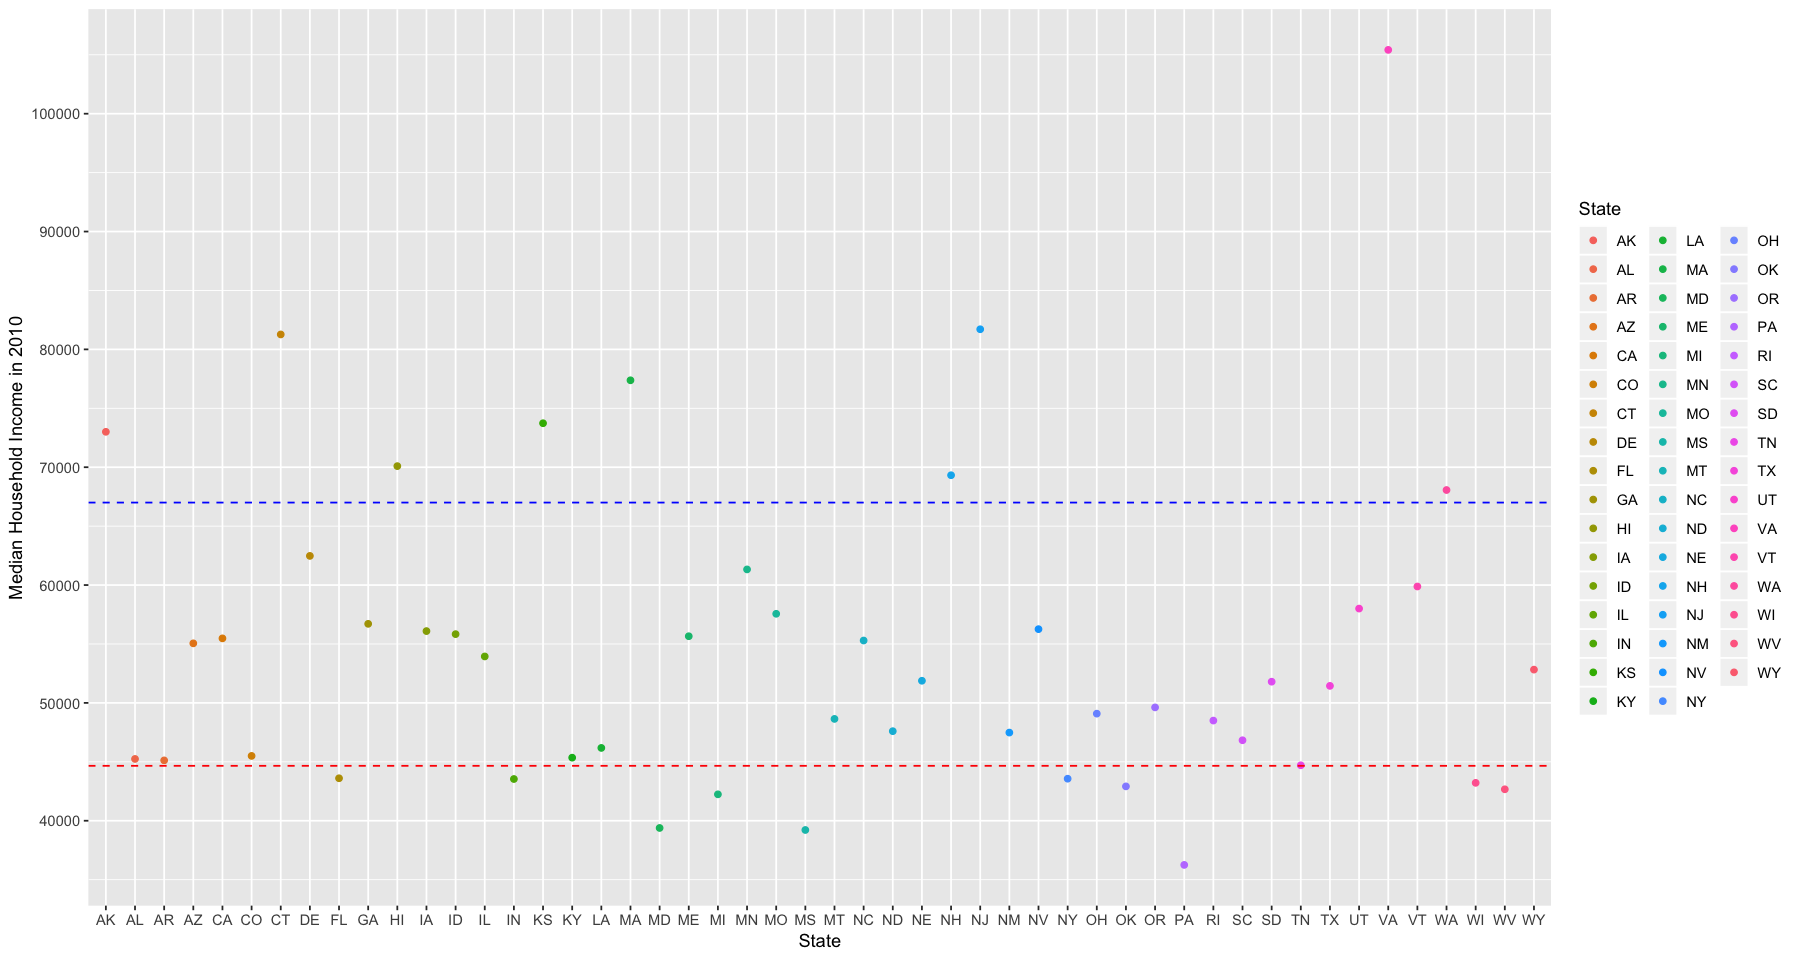

In [35]:
#Household median incomes for the largest population in each state
m = select(pop19, c('median_household_income_2010', 'median_household_income_2016', 
                'median_household_income_2017', 'median_household_income_2019'))

# Create a column of just abbreviated state names
names=c('AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS',
        'KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
        'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA',
        'WA','WV','WI','WY')

#add abbreviated state names to dataframe
row.names(m) = names
m$States <- row.names(m)

#To remove scientific notation 
options(scipen=10000)

#Plot 2010 median household income
plot1 <- ggplot(m, aes(m$States, m$median_household_income_2010,color=m$States)) + 
geom_point() + geom_hline(yintercept=44660, linetype="dashed", color = "red") +
geom_hline(yintercept=67000, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2010") + labs(color = "State") + 
scale_y_continuous(breaks=seq(0,120000,10000)); 


#Plot 2016
plot2 <- ggplot(m, aes(m$States, m$median_household_income_2016,color=m$States)) + 
geom_point() + geom_hline(yintercept=44660, linetype="dashed", color = "red") +
geom_hline(yintercept=67000, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2016") + labs(color = "State") + 
scale_y_continuous(breaks=seq(0,120000,10000))

#Plot 2017
plot3 <- ggplot(m, aes(m$States, m$median_household_income_2017,color=m$States)) + 
geom_point() + geom_hline(yintercept=44660, linetype="dashed", color = "red") +
geom_hline(yintercept=67000, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2017") + labs(color = "State") + 
scale_y_continuous(breaks=seq(0,120000,10000))

#Plot 2019
plot4 <- ggplot(m, aes(m$States, m$median_household_income_2019,color=m$States)) + 
geom_point() + geom_hline(yintercept=44660, linetype="dashed", color = "red") +
geom_hline(yintercept=67000, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2019") + labs(color = "State") + 
scale_y_continuous(breaks=seq(0,120000,10000))

# Plotting all plots
 plot1; 
# plot2; 
# plot3; 
# plot4; 

[1] 0.9876229

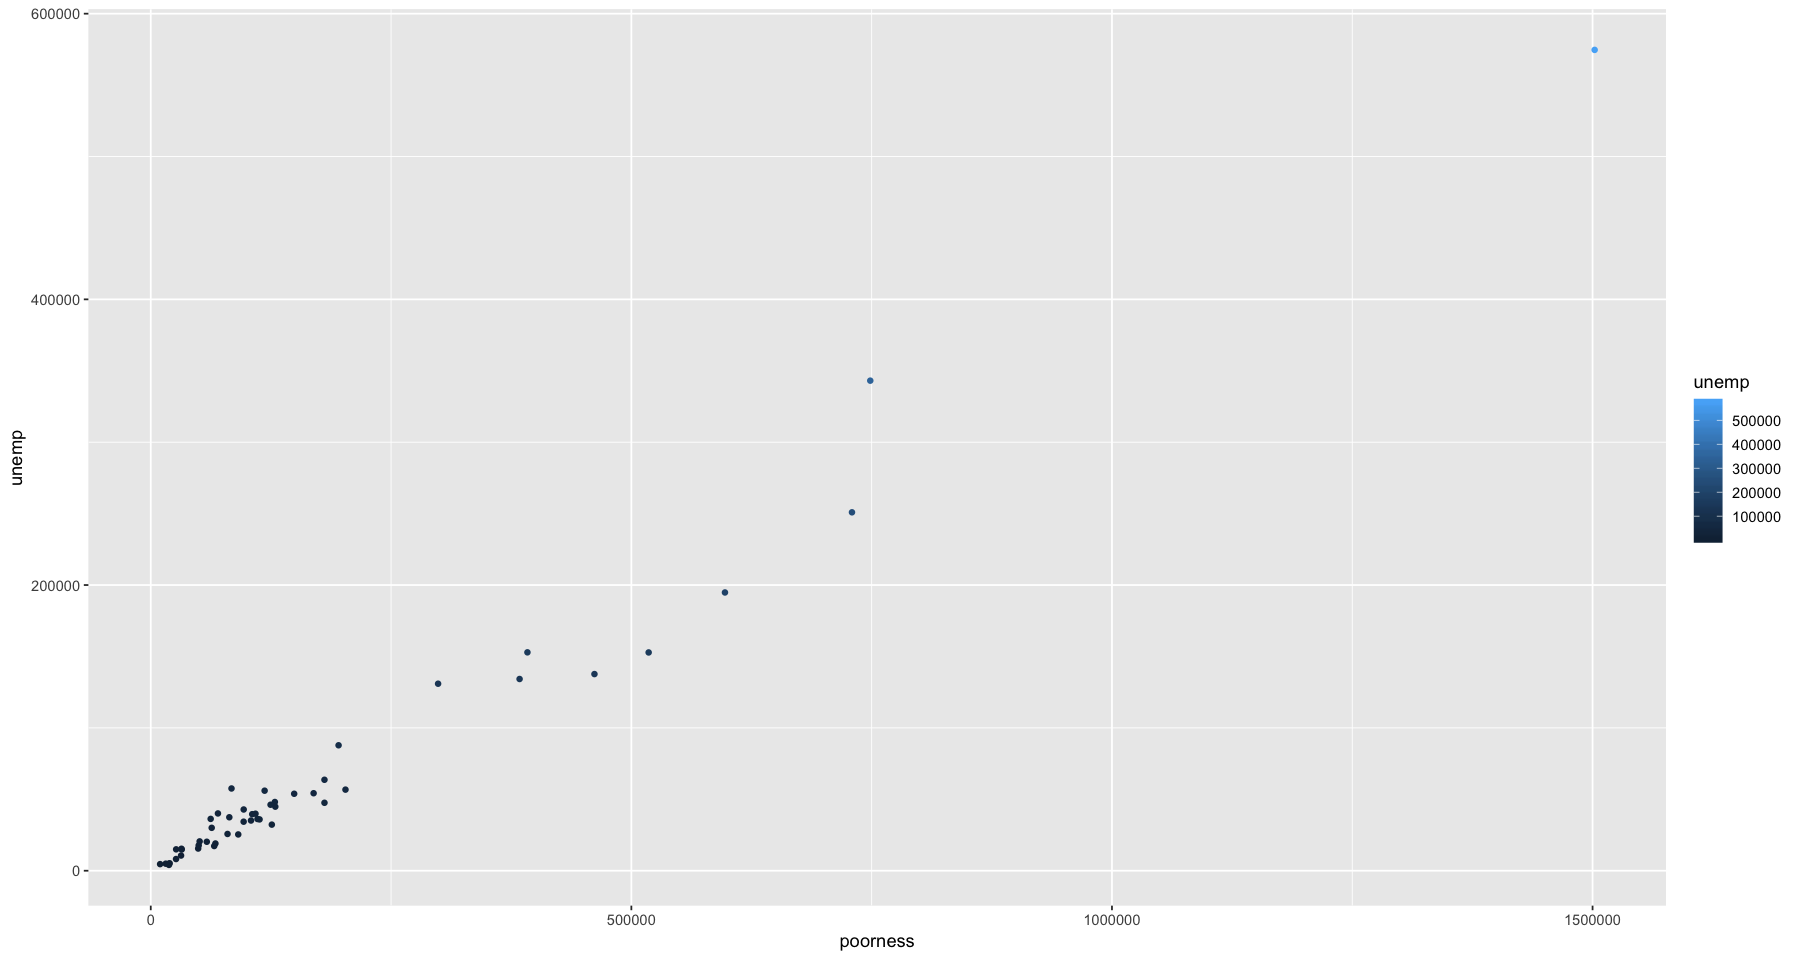

In [4]:
# Correlation between people who are unpemployed and poor
unemp = (pop19$unemployment_rate_2019*poverty18$pop_2019)/100; 
poorness = (pop19$poverty_2019*poverty18$pop_2019)/100; 
cor(unemp, poorness)

#Create dataframe fore unemp and poorness
df = data.frame(unemp, poorness)

#Plot of it
ggplot(df, mapping = aes(x = poorness, y = unemp)) + geom_point(aes(colour = unemp), shape = 16) 

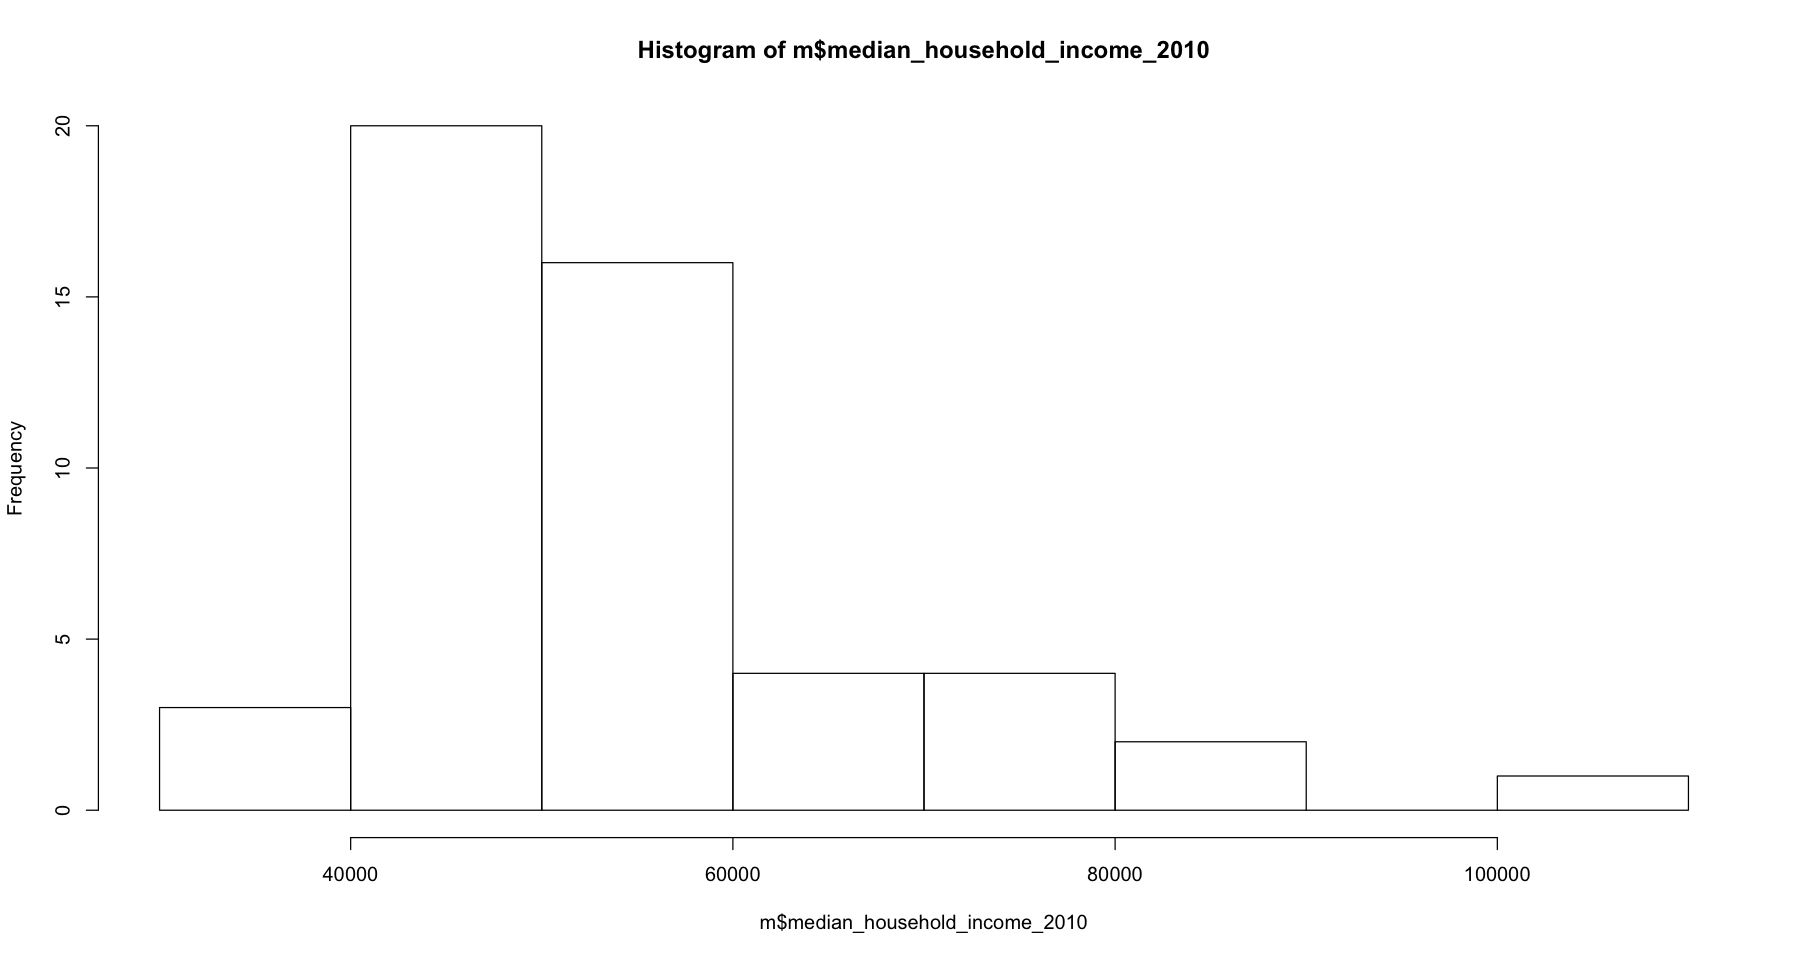

In [5]:
hist(m$median_household_income_2010)

In [6]:
# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
povertyrates = select(pop19, c('state','pop_2019', 'poverty_under_18_2019', 'age_under_5_2019',
                              'age_over_65_2019', 'age_over_18_2019', 'poverty_2019'))
# Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
povertyrates$updated = (povertyrates$pop_2019 * povertyrates$poverty_under_18_2019)/100
povertyrates$pov = (povertyrates$pop_2019 * povertyrates$poverty_2019)/100

# Ajdusted the poverty rate under the age of 5 to scale the proportion of the population (2019)
povertyrates$updated2 = (povertyrates$pop_2019 * povertyrates$age_under_5_2019)/100

# Ajdusted the poverty rate over age of 18 to scale the proportion of the population in 2019
povertyrates$updated3 = (povertyrates$pop_2019 * povertyrates$age_over_18_2019)/100

# Creating vectors for poverty
label = c("Total Sample County Population", "Total Poverty Under 18")

under_18 = c(sum(povertyrates$pop_2019), sum(povertyrates$updated))
df1 = data.frame(label, under_18)

# Creating vectors for poverty
label2 = c("Total Sample County Population", "Total Poverty Under 5")
under_5 = c(sum(povertyrates$pop_2019), sum(povertyrates$updated2))
df2 = data.frame(label2, under_5)

# Creating vectors for poverty
label3 = c("Total Sample County Population", "Total Poverty")
total_pov = c(sum(povertyrates$pop_2019), sum(povertyrates$pov))
df3 = data.frame(label3, total_pov)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

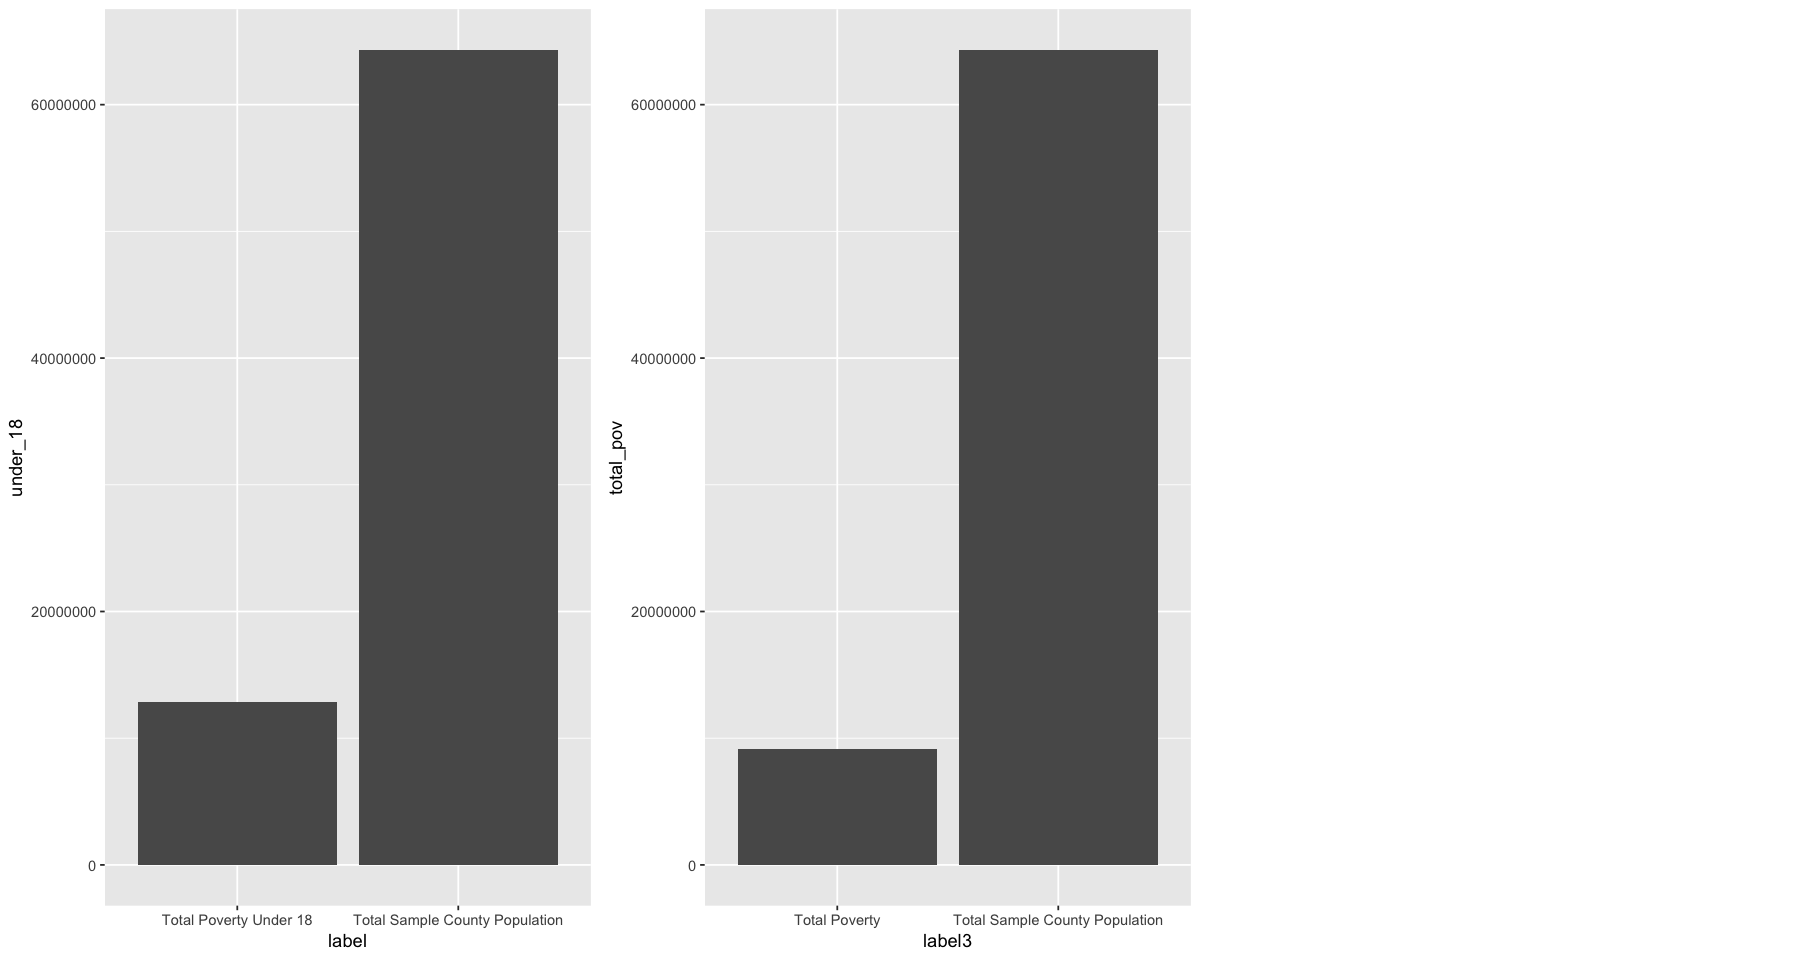

In [7]:
library(gridExtra)
p1 <- ggplot(df1) +
        geom_histogram(aes(x = label, y = under_18), stat = 'identity')

#p2 <- ggplot(df2) +
        #geom_histogram(aes(x = label2, y = under_5), stat = 'identity')

p3 <- ggplot(df3) +
        geom_histogram(aes(x = label3, y = total_pov), stat = 'identity')

grid.arrange(p1, p3, ncol = 3)

In [69]:
minn = filter(county, state == 'Minnesota')

minn_poverty = select(minn, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')
minn_poverty = arrange(minn_poverty, name)
minn_poverty$names = c("Aitkin", "Anoka", "Becker", "Beltrami",
                      "Benton", "Big Stone", "Blue Earth", "Brown", 
                      "Carlton", "Carver", "Cass",
                      "Chippewa", "Chisago", "Clay", "Clearwater",
                      "Cook", "Cottonwood", "Crow Wing", "Dakota",
                      "Dodge", "Douglas", "Faribault", "Fillmore",
                      "Freeborn", "Goodhue", "Grant", "Hennepin",
                      "Houston", "Hubbard", "Isanti", "Itasca",
                      "Jackson", "Kanabec", "Kandiyohi", "Kittson",
                      "Koochiching"," Lac qui Parle", "Lake",
                      "Lake of the Woods", "Le Sueur", "Lincoln", "Lyon",
                      "Mahnomen", "Marshall",
                      "Martin", "McLeod", "Meeker", "Mille Lacs",
                      "Morrison", "Mower"," Murray", "Nicollet",
                      "Nobles", "Norman", "Olmsted", "Otter Tail",
                      "Pennington", "Pine", "Pipestone", "Polk", 
                      "Pope", "Ramsey", "Red Lake", "Redwood", 
                      "Renville", "Rice", "Rock", "Roseau",
                      "Scott", "Sherburne", "Sibley",
                      "St. Louis", "Stearns", "Steele", "Stevens",
                      "Swift", "Todd", "Traverse", 'Wabasha',
                      'Wadena', "Waseca", "Washington", "Watonwan",
                      "Wilkin", "Winona", "Wright", "Yellow Medicine")

minn_poverty$poverty_under_18_2019 = c(18.0, 7.7, 15.8, 24.8, 11.3, 10.0, 11.8, 8.2, 12.0, 3.6,
                                 23.2, 9.0, 6.7, 13.7, 18.9, 15.6, 10.9, 14.7, 8.0, 5.0, 8.2, 16.8,
                                 17.5, 15.6, 13.3, 13.1, 13.3, 10.1, 17.0, 8.8, 15.9, 9.9, 11.7, 15.5,
                                 12.7, 19.2, 7.1, 12.1, 20.4, 12.8, 12.7, 18.4, 33.8, 7.6,
                                 18.9, 11.2, 7.1, 17.1, 10.8, 18.2, 7.4, 9.1, 19.2, 9.7, 10.4,
                                 11.4, 17.7, 12.7, 15.4, 18.0, 7.2, 20.6, 13.9, 13.2, 13.3, 13.3, 10.2,
                                 11.3, 7.3, 8.4, 10.5, 14.5, 16.8, 11.5, 6.1, 18.2, 16.8, 11.7, 8.5, 
                                 16.3, 10.0, 5.1, 20.8, 16.0, 10.1, 4.3, 12.3)

minn_poverty$poverty_2019 = c(12.2, 5.9, 11.0, 18.9, 10.3, 10.1, 17.6, 6.9, 11.3, 4.1, 13.6,
                                 9.3, 6.0, 12.3, 14.6, 12.6, 11.0, 10.8, 6.0, 5.1, 7.6, 11.5,
                                 10.7, 11.0, 9.3, 9.6, 10.4, 7.9, 11.8, 7.3, 12.2, 7.9, 10.0,
                                 10.5, 11.2, 13.6, 8.3, 8.7, 10.7, 8.5, 10.9, 14.1, 23.3, 6.9, 13.7,
                                 8.5, 6.7, 12.4, 10.2, 13.5, 7.1, 9.9, 13.6, 8.8, 8.4, 9.3, 11.0, 11.0, 11.7,
                                 11.8, 7.2, 14.0, 10.5, 10.1, 10.0, 9.2, 9.0, 8.1, 5.5, 6.4, 7.9, 14.1,
                                 12.9, 8.9, 12.4, 12.5, 11.9, 9.9, 7.7, 14.3, 9.7, 4.3, 13.4, 9.2, 12.9,
                                 4.6, 11.8)
#select(minn_poverty, 'name', 'poverty_under_18_2019', 'poverty_2019')


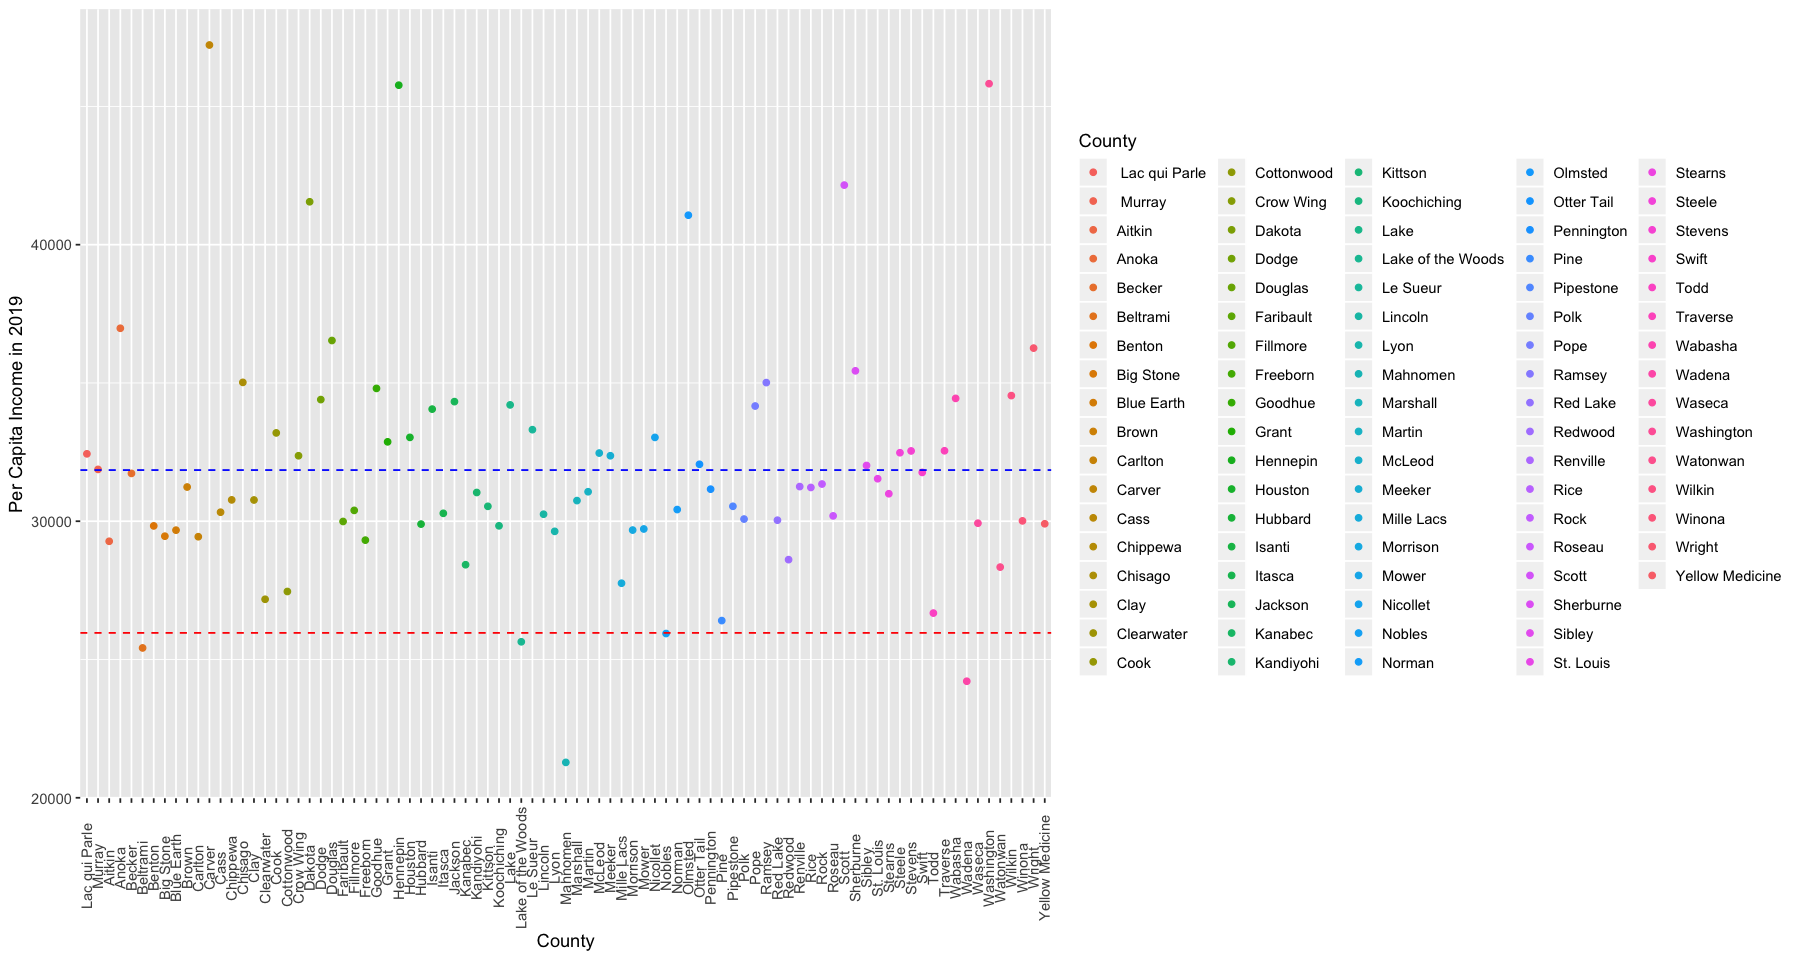

In [127]:
plot1 <- ggplot(minn_poverty, aes(minn_poverty$names, minn_poverty$per_capita_income_2019
                                  ,color=minn_poverty$names)) + 
geom_point() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=25962, linetype="dashed", color = "red") +
geom_hline(yintercept=31850, linetype="dashed", color = "blue") + 
xlab("County") +
ylab("Per Capita Income in 2019") + labs(color = "County") + 
scale_y_continuous(breaks=seq(0,120000,10000)); 

plot1


In [87]:
house = (select(minn, persons_per_household_2019))
colMeans(house)

income = select(minn_poverty, per_capita_income_2019)
colMeans(income)

persons_per_household_2019 
                  2.394138

per_capita_income_2019 
               31850.7

In [82]:
# Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
minn_poverty$updated = (minn_poverty$pop_2019 * minn_poverty$poverty_under_18_2019)/100
minn_poverty$pov = (minn_poverty$pop_2019 * minn_poverty$poverty_2019)/100

# Creating vectors for poverty
label = c("Total MN Population", "Total Poverty Under 18", "Total Poverty in MN")

minn_under_18 = c(sum(minn_poverty$pop_2019), sum(minn_poverty$updated), sum(minn_poverty$pov))
df1 = data.frame(label, minn_under_18)

p1 <- ggplot(df1) +
        geom_histogram(aes(x = label, y = minn_under_18), stat = 'identity')
#p1

# Proportion of poverty under 18 out of the population
#sum(minn_poverty$updated)/sum(minn_poverty$pop_2019)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [125]:
# Scaling percentage of people who have no bachelor's
#NEEDS TO BE FIXED
minn_poverty$no_bach_2019 = (minn_poverty$pop_2019*(100 - minn_poverty$bachelors_2019))/100

edu <- ggplot(minn_poverty, aes(x = minn_poverty$no_bach_2019, y = minn_poverty$pov
                                  , color=minn_poverty$no_bach_2019)) + geom_point()

minn_poverty$with_bach_2019 = (minn_poverty$pop_2019* minn_poverty$bachelors_2019)/100

edu2 <- ggplot(minn_poverty, aes(x = minn_poverty$with_bach_2019, y = minn_poverty$per_capita_income_2019
                                  , color=minn_poverty$with_bach_2019)) + geom_point()